# Abstract

We explore and compare the frequency distributions of words in corpora of both spoken and written English. We find that for the three spoken English corpuses considered, a double powerlaw model is a better fit for the data than a regular powerlaw, however we are unable to rule out a lognormal model. This builds on [previous work][1], which found that a double powerlaw model is the best fit for extremely large databases of written English. That paper suggests this is the result of two different classes of words: a finite number of core words and a virtually infinite number of noncore words. My study suggests that the same may be true for spoken English, except the set of core words is much smaller, perhapse due to people having less time to recall more complex words when speaking as opposed to writing.

This report also describes the role of various functions found in the module ```utils2.py```, which are used in this study for data analysis.

[1]: https://journals.aps.org/prx/pdf/10.1103/PhysRevX.3.021006

# Acknowlegment 

This study was supported by a University of Sydney Faculty of Science Denison Research Scholarship and supervised by Associate Professor Eduardo G. Altmann. 

# Statistical Models

This section provides a background on the three stastical models we fit to the data; power law, double power law and log normal. These models are used for heavy tail datasets. 

## Power Law

A power law distribution is described by the function: 

$f(r) = C r^{-\alpha}$

In the case of this study, $f(r)$ is the frequency (as a fraction of all word tokens) with which the $r^{th}$ most frequent word type occurs. 

Note that $\alpha$ is the only parameter of this model, since $C$ is determined by the requirement that the function be normalized. If a dataset is distributed according to a power law, it will form a straight line when displayed on a log-log plot. 

## Double Power Law

A double power law distribution is described by the function: 

$f(r) = C\begin{cases}
r^{-\alpha_1}, & r\leq b\\
Br^{-\alpha_2} & r>b,
\end{cases}$ 

Here $\alpha_1$, $\alpha_2$ and $b$ are paramaters, and $C$ and $B$ are constants determined by normalization and the requirement that the function be continuous at $b$. If a dataset is distributed according to a double power law, it will form two straight lines of (generally) different gradients which intersect at $b$.

## Log Normal

A log normal distribution is described by the function: 

$Cr^{-1}exp\left(\frac{-\frac{1}{2}(ln(r) - \mu)^2}{\sigma^2}\right)$

Here $\mu$ and $\sigma$ are paramaters. A dataset distributed according to a log normal model has logarithm that is normally distributed


# Generating Random Data

As part of the study, a method of generating random samples according to a given model was required in order to test that the methods of model paramater estimation were accurate. 

## Generating a discrete power law using the interval method

The method:
```python
def gen_samp_interval(alpha = 1.8, size = 1e6, maxRank = 10000, normalized = False)
```
can be used to do this. 

This method divides the interval (0, 1) according to a power law with the given $\alpha$, with the $r^{th}$ subdivision having width $Cr^{-\alpha}$ for some constant C. Following this, 'size' random numbers are generated (in the range (0, 1)) and we record how many numbers fall in each subdivision. The subdivisions start large and quickly get smaller, creating a power law in the count of numbers falling in each subdivision. 

## Generating a discrete double power law using the interval method

This can be done using:

```python
def gen_samp_dpl_interval(alp1, alp2, b, size = int(1e6), rMax = 10000) :
```

Here the interval (0, 1) is divided with the width of the $r^{th}$ subinterval given by: 

$f(r) = C\begin{cases}
r^{-\alpha_1}, & r\leq b\\
Br^{-\alpha_2} & r>b,
\end{cases}$ 

For some constants B and C. Repeating the random number generation as above gives us a double power law

## Generating a log normal distribution using the interval method

This can be done using:

```python
def gen_samp_log_normal_interval(mu = 1, sigma = 1, size = int(1e6), rMax = 10000) :
```

Which uses a similar method to those described above. 


#  Corpora

## Spoken

### British National Corpus

Description: http://ucrel.lancs.ac.uk/bncfreq/

Frequency data: http://ucrel.lancs.ac.uk/bncfreq/lists/2_2_spokenvwritten.txt

The data is provided as a list of words and their freqeuency per million words in the British National Corpus. Only words more frequent than 10 occurances per million are included in this list. 


### Santa Barbara Corpus of Spoken American English

See: http://www.linguistics.ucsb.edu/research/santa-barbara-corpus

Approximately 249,000 words. The corpus consists of 60 transcripts of natural conversations. The transcripts are contained in database files and include some annotations. We processed them as text files to remove annotations and database metadata and then computed word frequencies. 

### Corpus of Contemporary American English 

See: https://www.corpusdata.org/formats.asp

We used a free sample of the data. The spoken data consisted of transcripts of unscripted conversation on TV and radio programs. We note that this is likely to result in a different distribution from natural conversation 

## Written

### War and Peace 

See: http://www.gutenberg.org/files/2600/2600-h/2600-h.htm

The book 'War and Peace' by Leo Tolstoy. It is one of the longest books written and contains approximately 580,000 words. 

### British National Corpus

See the 'British National Corpus' section above. 


# Calculation of Constants

The constants for the three distributions can be calculated using the methods:
```python
def get_const(alp, xMin = 1, accuracy = 4) :

def get_const_dpl(alp1, alp2, b, xMin = 1, accuracy = 4) :

def get_const_lognorm(mu, sigma, xMin = 1, accuracy = 4) :
```

In the case of a power law, we know that the sum of the freqencies of all word types must be 1. I.e. 

$\Sigma{Cr^{-\alpha}} = 1$

Giving:

$C = \frac{1}{\Sigma{r^{-\alpha}}}$

$C$ is then be calculated numerically by evaluating this sum for values of $r$ from 1 to 10000.

# Model Parameter Estimation

We fit the statistical models by using optimization techniques from the ```scipy``` package to minimize the negative of the log-Likelihood. 

The following cells contain Python code that reads in the word frequency data and uses the functions contained in ```utils2.py``` to analyse and display the data. 

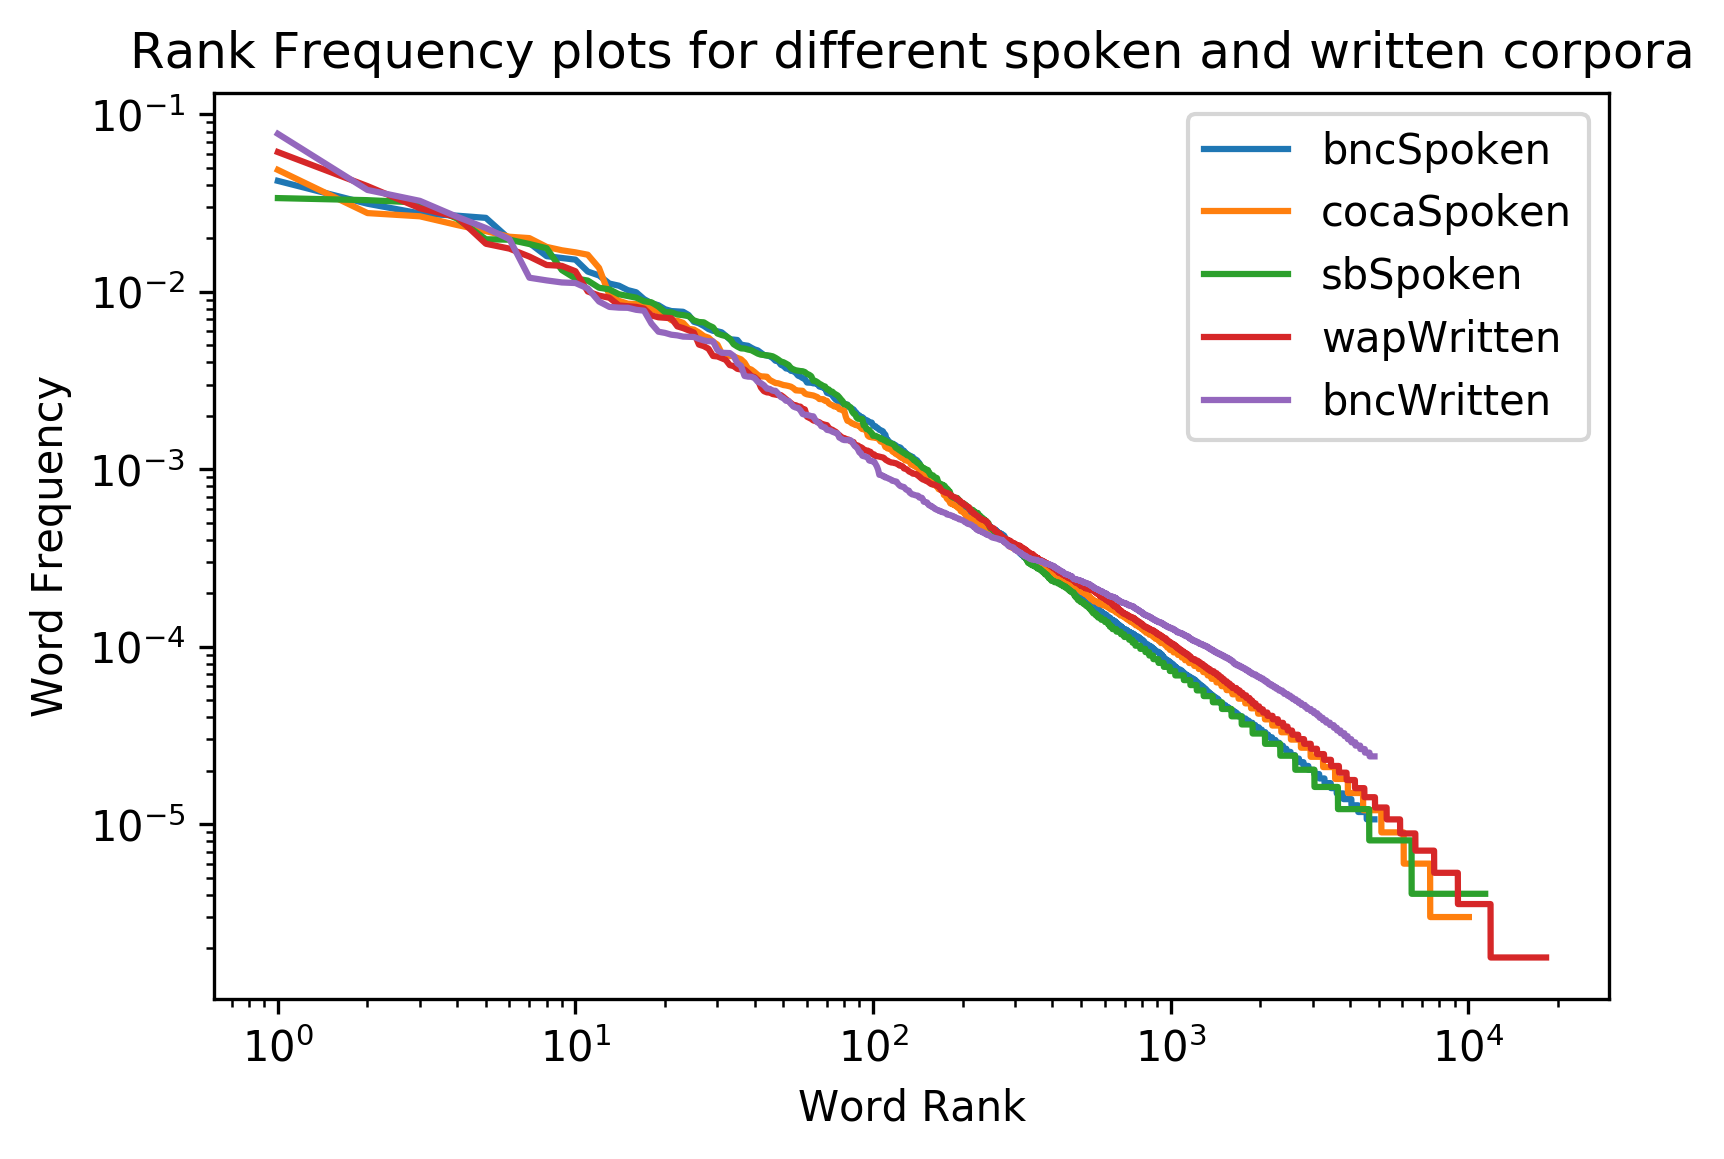

In [21]:
import pickle
import utils2 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
import importlib

%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

bncSpoken = pickle.load(open('bncSpoken.p', 'rb'))
cocaSpoken = pickle.load(open('cocaSpSamp.p', 'rb'))
sbSpoken = pickle.load(open('sbCorpus.p', 'rb'))
wapWritten = pickle.load(open('warpeace.p', 'rb'))
bncWritten = pickle.load(open('bncWritten.p', 'rb'))

dataSets = [bncSpoken, cocaSpoken, sbSpoken, wapWritten, bncWritten]
dataSetNames = ['bncSpoken', 'cocaSpoken', 'sbSpoken', 'wapWritten', 'bncWritten']
freqData = [[x[1] for x in ds] for ds in dataSets]
normedData = [[x/sum(fs) for x in fs] for fs in freqData]

for name, nfreqs in zip(dataSetNames, normedData) :
    plt.loglog(range(1, len(nfreqs)+1), nfreqs, label = name)

plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.title('Rank Frequency plots for different spoken and written corpora')
plt.legend()

results = {}

In [22]:
def analyse(freqs, xMins = [70, 2, 2]) :
    matplotlib.rcParams['figure.dpi'] = 300
    matplotlib.rcParams['figure.figsize'] = (6, 18)
    importlib.reload(utils2)

    xMin = xMins[0]
    fig, (rfAx, powLawAx, dpowLawAx, logNAx) = plt.subplots(4, 1)
    utils2.plot_freqs(rfAx, freqs)
  
    alphaHat = utils2.fit_max_likelihood(freqs, xMin = xMin)
    with np.errstate(all = 'ignore') :
        ll = utils2.get_likelihood_normalized(alphaHat, freqs, xMin)
    utils2.plot_freqs(powLawAx, freqs, xMin = xMin)
    utils2.gen_func(alphaHat, xMin, powLawAx)
    print('POWER LAW:')
    print('AlphaHat: ', alphaHat)
    print('Log Likelihood: ', ll)
    #print('Norm Likelihood: ', ll/sum(freqs[xMin-1:]))

    xMin = xMins[1]
    with np.errstate(all = 'ignore') :
        params, logLike = utils2.fit_dpl_max_likelihood(freqs, method = 'Nelder-Mead', xMin = xMin)
    utils2.plot_freqs(dpowLawAx, freqs, xMin = xMin)
    utils2.gen_func_dpl(*params, xMin, dpowLawAx)
    print('\nDOUBLE POWER LAW:')
    print('a1_Hat, a2_Hat, bHat = ', *params)
    print('Log likelihood: ', logLike)
    #print('Norm Likelihood: ', logLike/sum(freqs[xMin-1:]))

    xMin = xMins[2]
    with np.errstate(all = 'ignore') :
        (mu, sigma), logLikeN = utils2.fit_lognorm_max_likelihood(freqs, xMin = xMin)
    utils2.plot_freqs(logNAx, freqs, xMin = xMin)
    utils2.gen_func_lognorm(mu, sigma, logNAx, xMin)
    print('\nLOG NORMAL:')
    print('mu, sigma = ', mu, sigma)
    print('Log likelihood: ', logLikeN)
    #print('Norm Likelihood: ', logLike/sum(freqs[xMin-1:]))
    
    return ((alphaHat, ll), (*params, logLike), (mu, sigma, logLikeN))
    

POWER LAW:
AlphaHat:  1.4276696051
Log Likelihood:  7.33972391093

DOUBLE POWER LAW:
a1_Hat, a2_Hat, bHat =  0.731440895763 1.43793240192 70.4598320885
Log likelihood:  6.18824286596

LOG NORMAL:
mu, sigma =  3.87564487261 2.33493856953
Log likelihood:  6.17849563684


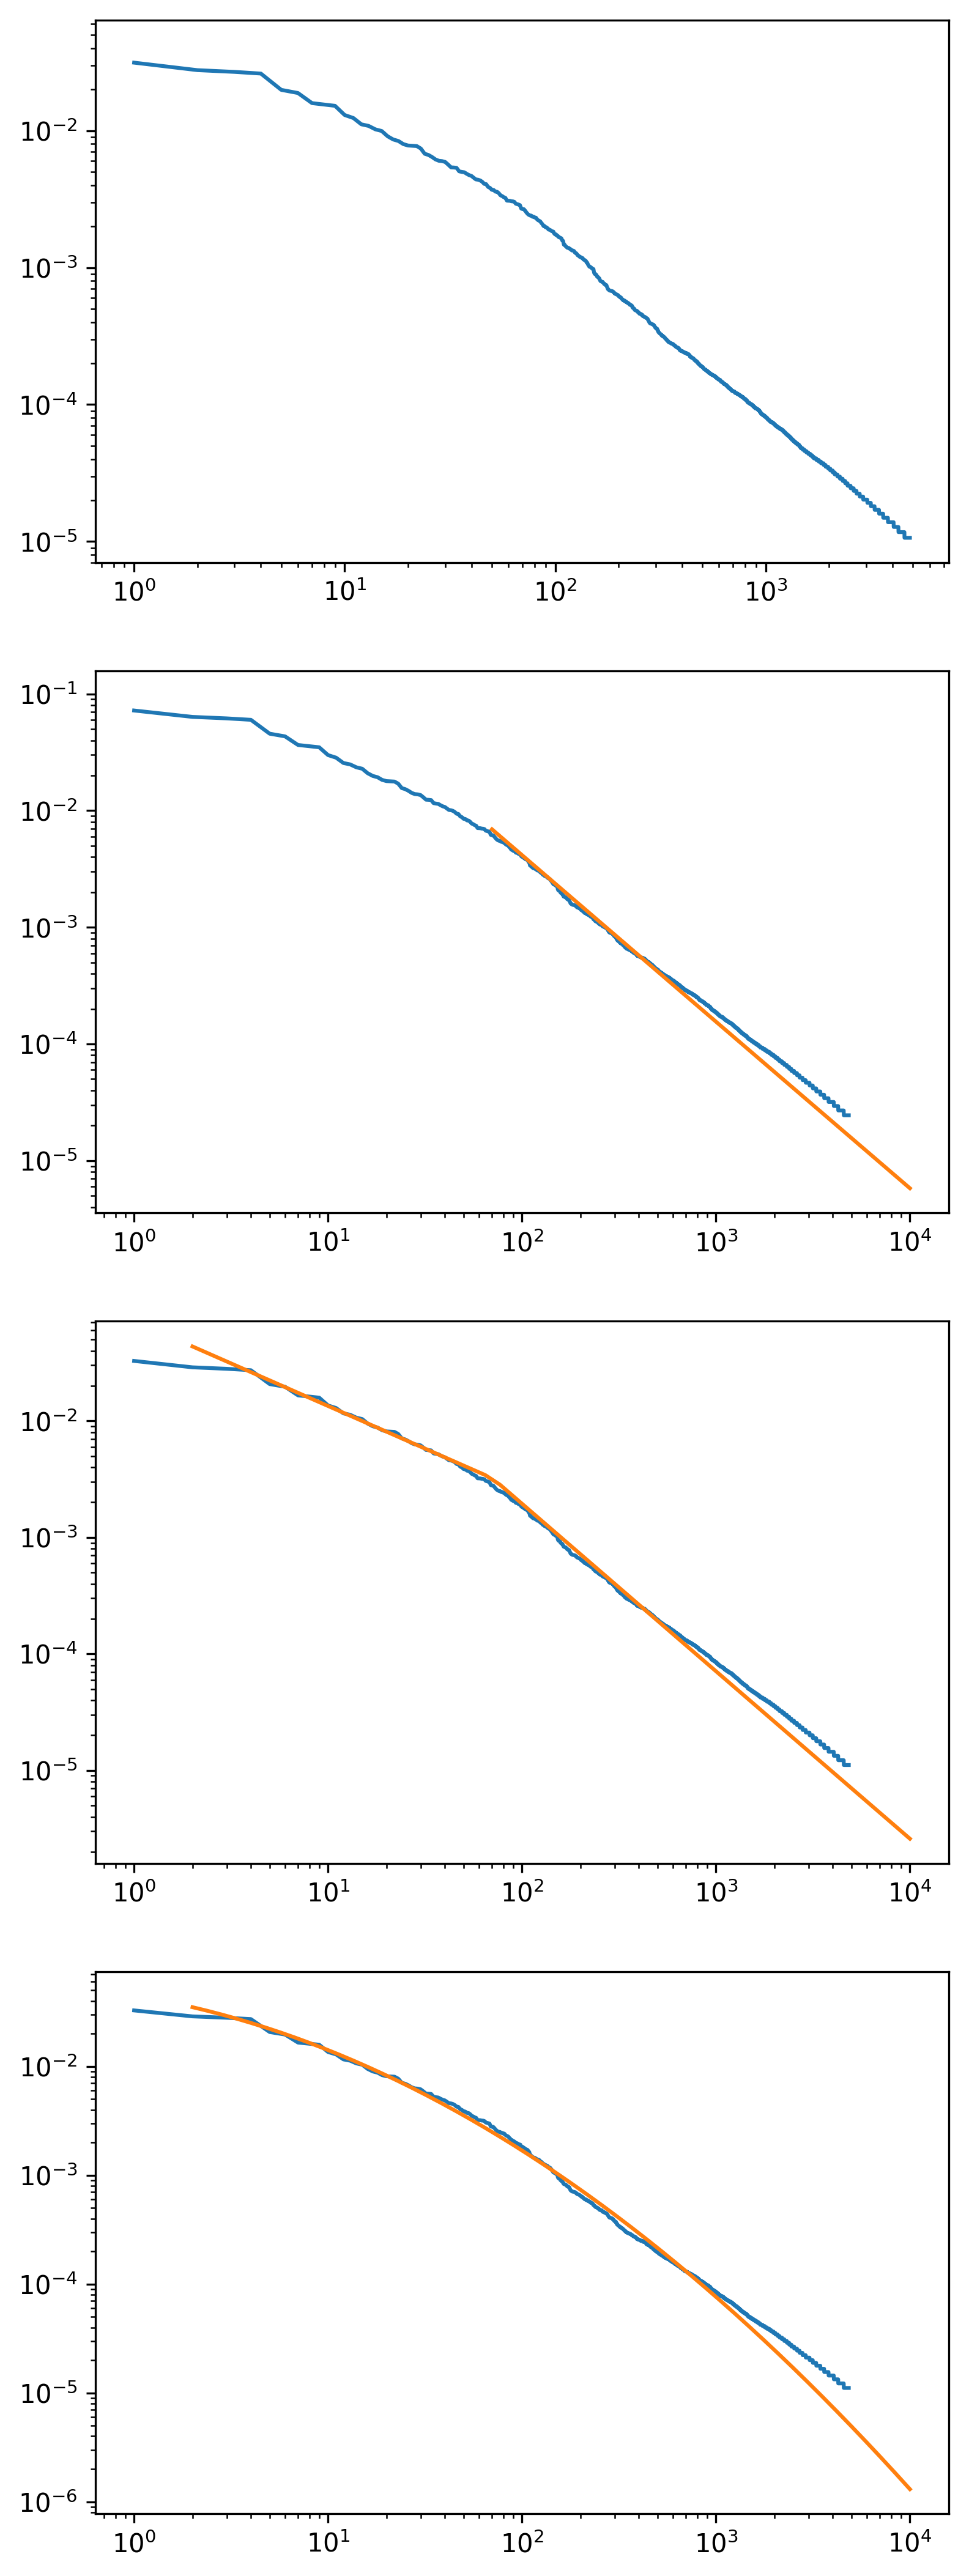

In [23]:
bncTup = analyse([x[1] for x in bncSpoken], [70, 2, 2])

In [24]:
sbTup = analyse([x[1] for x in sbSpoken], [55, 2, 2])

POWER LAW:
AlphaHat:  1.32370935236
Log Likelihood:  7.44422809825

DOUBLE POWER LAW:
a1_Hat, a2_Hat, bHat =  0.724339193955 1.33553371042 58.5700295051
Log likelihood:  6.37337220211

LOG NORMAL:
mu, sigma =  3.93617075581 2.72993364608
Log likelihood:  6.37935840952


POWER LAW:
AlphaHat:  1.25009416971
Log Likelihood:  7.76526295624

DOUBLE POWER LAW:
a1_Hat, a2_Hat, bHat =  0.789838845324 1.26213554555 67.3341947671
Log likelihood:  6.54813966238

LOG NORMAL:
mu, sigma =  4.10513237863 2.93566885543
Log likelihood:  6.54192546938


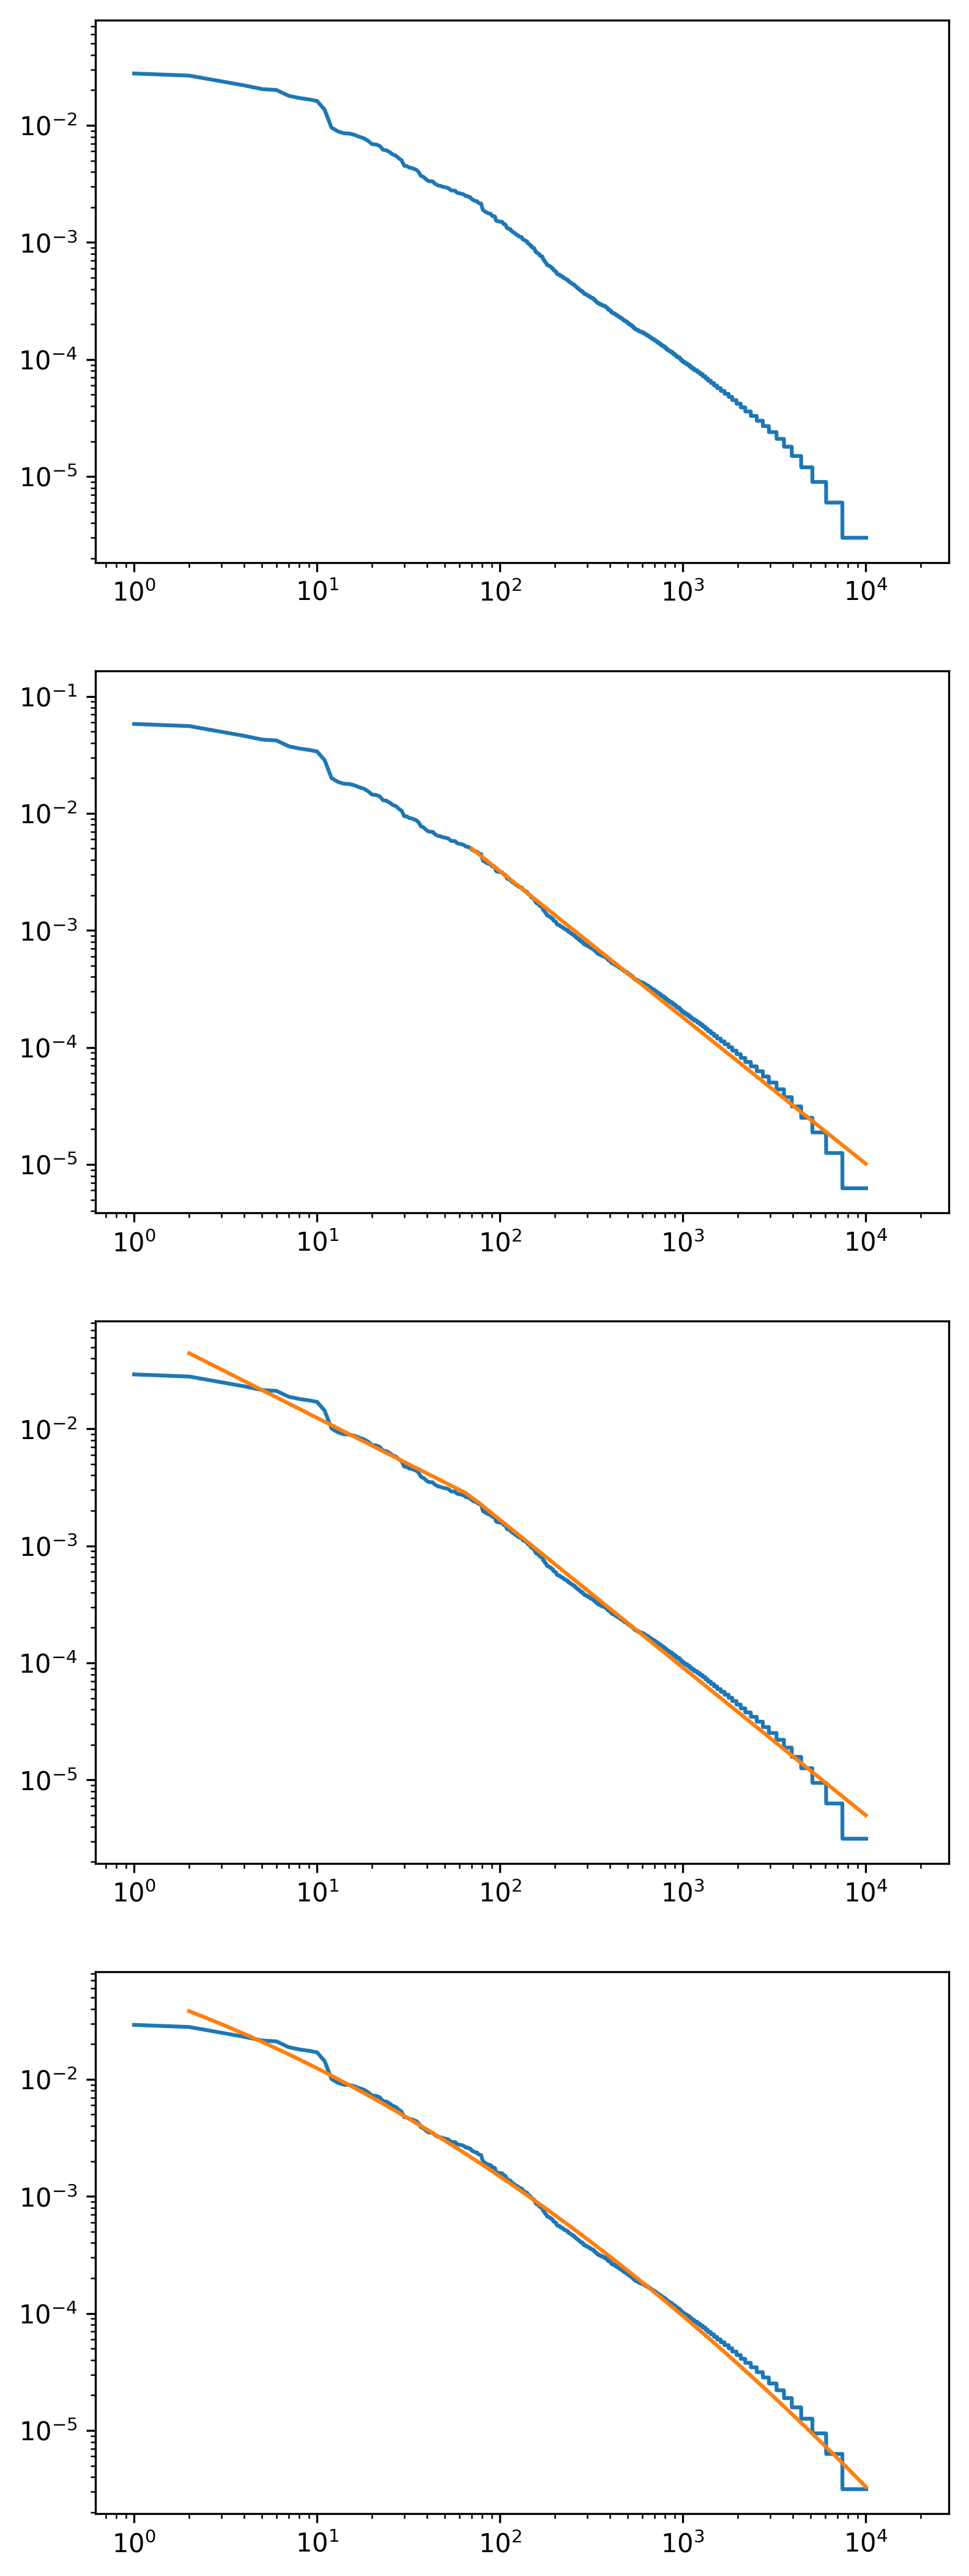

In [25]:
cocaTup = analyse([x[1] for x in cocaSpoken], [70, 2, 2])

POWER LAW:
AlphaHat:  1.0
Log Likelihood:  6.65278449555

DOUBLE POWER LAW:
a1_Hat, a2_Hat, bHat =  0.734132160378 1.09968633273 21.5342067294
Log likelihood:  6.62801423987

LOG NORMAL:
mu, sigma =  4.45707775011 3.97204762125
Log likelihood:  6.63061050482


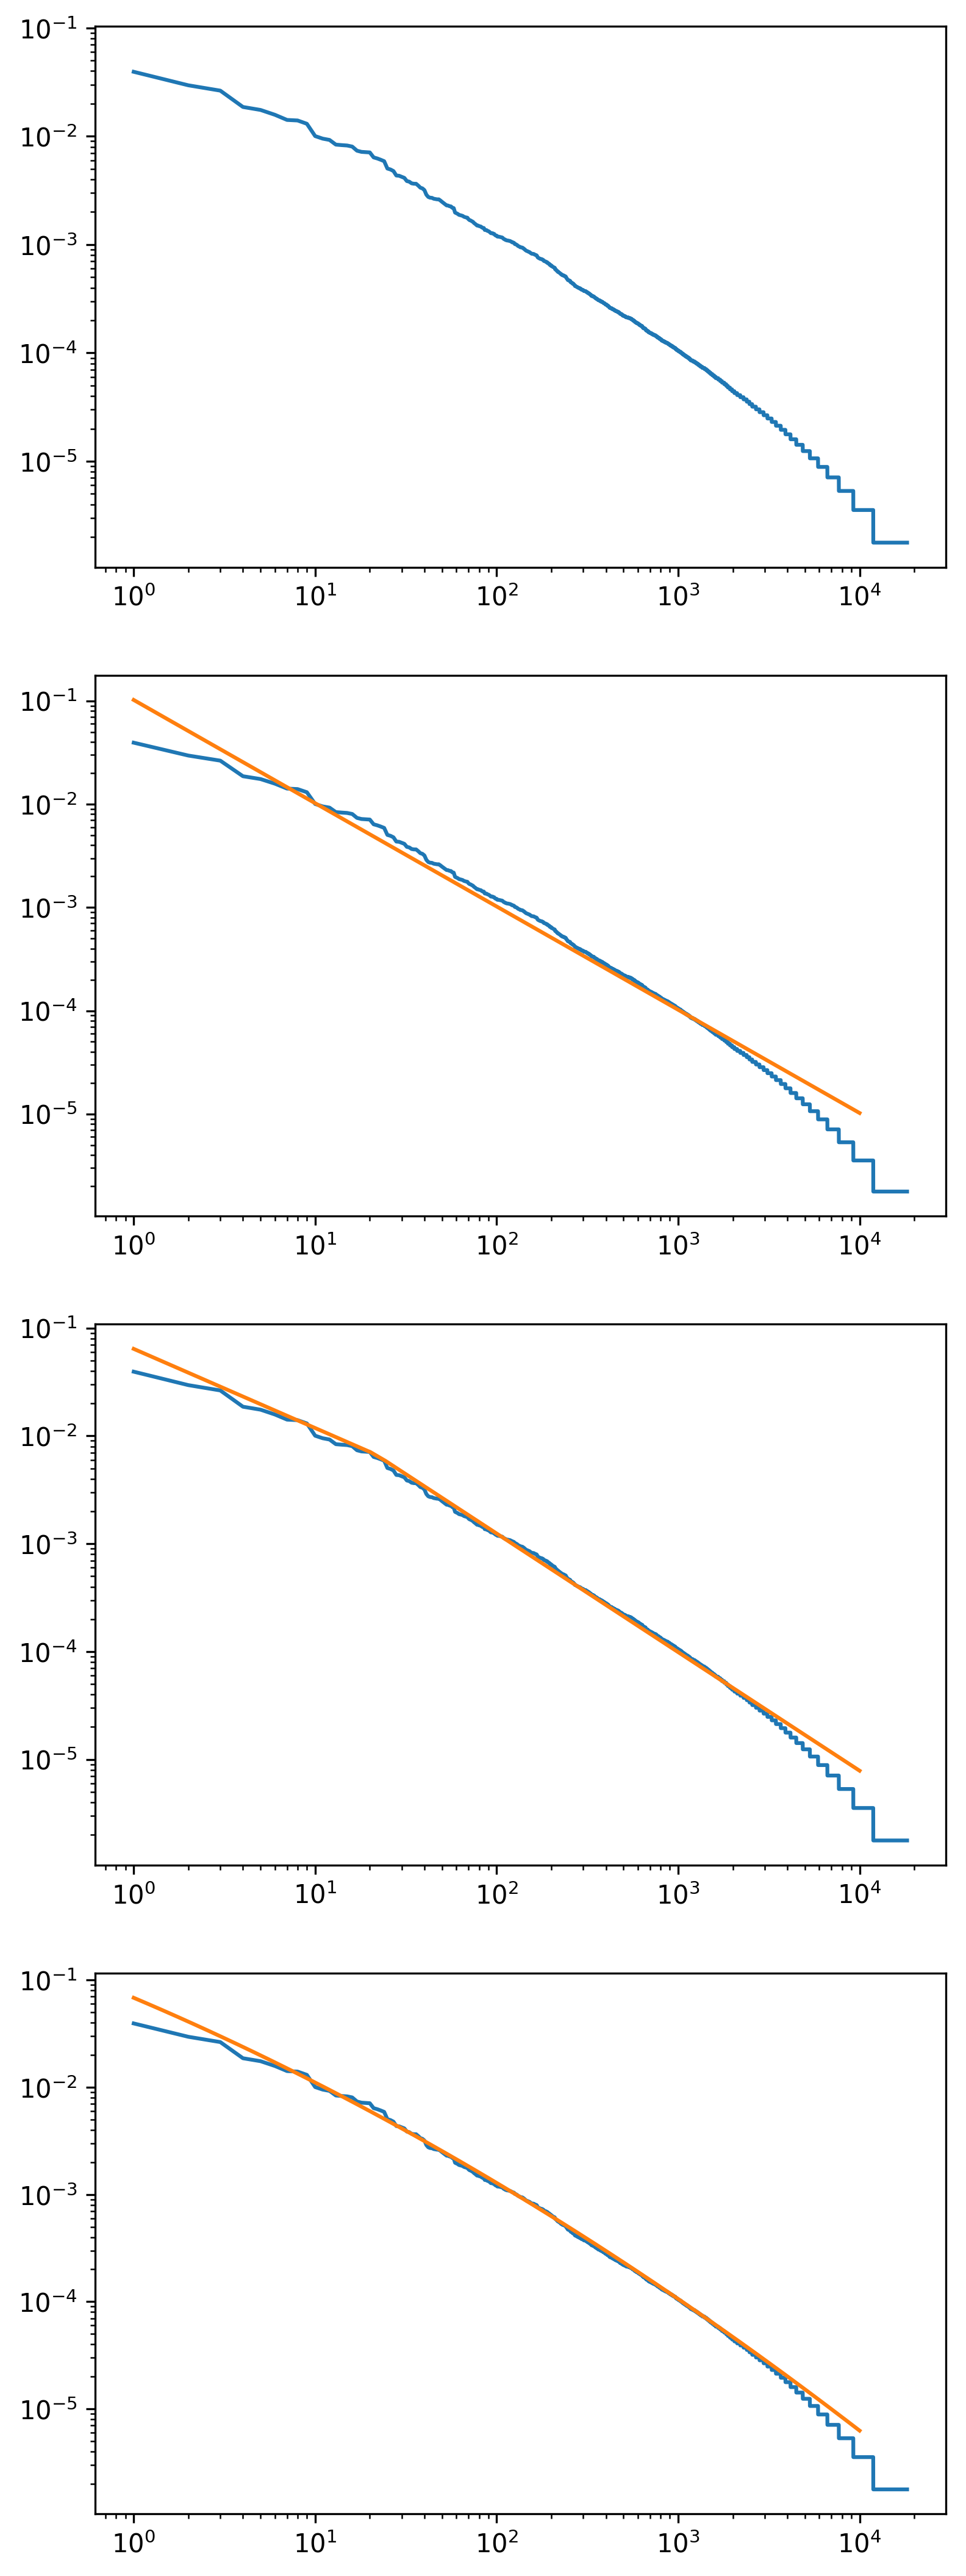

In [26]:
wapTup = analyse([x[1] for x in wapWritten], [1, 1, 1])

In [27]:
bnwTup = analyse([x[1] for x in bncWritten], [1, 1, 1])

POWER LAW:
AlphaHat:  1.00577865979
Log Likelihood:  6.56149922942


/mnt/c/Users/trist/Dropbox/Stat project/jup/utils2.py:78: RuntimeWarning: overflow encountered in double_scalars
  constB = const * b**(alp2-alp1)
/mnt/c/Users/trist/Dropbox/Stat project/jup/utils2.py:80: RuntimeWarning: invalid value encountered in double_scalars
  yAx += [constB * x**-alp2 for x in xAx if x >= b]



DOUBLE POWER LAW:
a1_Hat, a2_Hat, bHat =  0.952978876985 84.7350096978 4778.99076187
Log likelihood:  6.4779830784

LOG NORMAL:
mu, sigma =  4.24121143091 3.80969034738
Log likelihood:  6.53574249228


# Results

The parameters and corresponding negative log likelihood for each model and corpus are tabulated and displayed below. 

In [29]:
from IPython.display import Markdown, display

import itertools
def get_row_string(name, tup) :
    return '{} | {:.2f}; {:.3f} | {:.2f}, {:.2f}, {:.2f}; {:.3f} | {:.2f}, {:.2f}; {:.3f}'.format(name, *itertools.chain(*tup))

table = '''
Spoken | Power Law <br> \u03B1; l | Double Power Law <br> \u03B1\u2081, \u03B1\u2082, b; l | Log Normal <br> \u03BC, \u03C3; l 
--- | --- |--- | ---
{}\n{}\n{}\n{}\n{}
'''.format(get_row_string('British National Spoken', bncTup), get_row_string('Santa Barbara Spoken', sbTup), 
          get_row_string('COCA Spoken', cocaTup), get_row_string('War and Peace Written', wapTup), 
          get_row_string('British National Written', bnwTup))
display(Markdown(table))


Spoken | Power Law <br> α; l | Double Power Law <br> α₁, α₂, b; l | Log Normal <br> μ, σ; l 
--- | --- |--- | ---
British National Spoken | 1.43; 7.340 | 0.73, 1.44, 70.46; 6.188 | 3.88, 2.33; 6.178
Santa Barbara Spoken | 1.32; 7.444 | 0.72, 1.34, 58.57; 6.373 | 3.94, 2.73; 6.379
COCA Spoken | 1.25; 7.765 | 0.79, 1.26, 67.33; 6.548 | 4.11, 2.94; 6.542
War and Peace Written | 1.00; 6.653 | 0.73, 1.10, 21.53; 6.628 | 4.46, 3.97; 6.631
British National Written | 1.01; 6.561 | 0.95, 84.74, 4778.99; 6.478 | 4.24, 3.81; 6.536


# References

1. Gerlach, M., & Altmann, E. G. (2013). Stochastic model for the vocabulary growth in natural languages. Physical Review X, 3(2), 021006.